In [72]:
import os
import matplotlib.pyplot as plt
#To work with data frames
import pandas as pd

#To perform numerical operations
import numpy as np

#To visualize data
import seaborn as sns

#Importing library for logictic regression
from sklearn.linear_model import LogisticRegression

#Importing performance metrics - accuracy score and confusion
from sklearn.metrics import accuracy_score,confusion_matrix

os.chdir("D:\\program\\PYTHON\\CSV")
incomedata=pd.read_csv("income.csv")
data=incomedata.copy()
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB
None


In [3]:
data.isnull().sum() #No missing values

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [4]:
summary=data.describe()
print(summary)

                age   capitalgain   capitalloss  hoursperweek
count  31978.000000  31978.000000  31978.000000  31978.000000
mean      38.579023   1064.360623     86.739352     40.417850
std       13.662085   7298.596271    401.594301     12.345285
min       17.000000      0.000000      0.000000      1.000000
25%       28.000000      0.000000      0.000000     40.000000
50%       37.000000      0.000000      0.000000     40.000000
75%       48.000000      0.000000      0.000000     45.000000
max       90.000000  99999.000000   4356.000000     99.000000


In [8]:
summary_cate=data.describe(include="O")
print(summary_cate)

         JobType    EdType        maritalstatus       occupation relationship  \
count      31978     31978                31978            31978        31978   
unique         9        16                    7               15            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       22286     10368                14692             4038        12947   

          race gender   nativecountry                        SalStat  
count    31978  31978           31978                          31978  
unique       5      2              41                              2  
top      White   Male   United-States   less than or equal to 50,000  
freq     27430  21370           29170                          24283  


In [9]:
data["JobType"].value_counts()# there is ? needed to be replaced with NaN

JobType
Private             22286
Self-emp-not-inc     2499
Local-gov            2067
?                    1809
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [10]:
data["occupation"].value_counts()# there is ? needed to be replaced with NaN

occupation
Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-service        3212
Machine-op-inspct    1966
?                    1816
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces            9
Name: count, dtype: int64

In [14]:
print(np.unique(data["JobType"]),"\n")
print(np.unique(data["occupation"]))

[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay'] 

[' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']


In [37]:
data=pd.read_csv("income.csv",na_values=[" ?"])
data["JobType"].value_counts()

JobType
Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [38]:
data["occupation"].value_counts()

occupation
Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-service        3212
Machine-op-inspct    1966
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces            9
Name: count, dtype: int64

In [39]:
data.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [41]:
missing=data[data.isnull().any(axis=1)]
print(missing)

       age JobType         EdType        maritalstatus occupation  \
8       17     NaN           11th        Never-married        NaN   
17      32     NaN   Some-college   Married-civ-spouse        NaN   
29      22     NaN   Some-college        Never-married        NaN   
42      52     NaN           12th        Never-married        NaN   
44      63     NaN        1st-4th   Married-civ-spouse        NaN   
...    ...     ...            ...                  ...        ...   
31892   59     NaN      Bachelors   Married-civ-spouse        NaN   
31934   20     NaN        HS-grad        Never-married        NaN   
31945   28     NaN   Some-college   Married-civ-spouse        NaN   
31967   80     NaN        HS-grad              Widowed        NaN   
31968   17     NaN           11th        Never-married        NaN   

          relationship    race   gender  capitalgain  capitalloss  \
8            Own-child   White   Female            0            0   
17             Husband   White   

In [42]:
print(missing.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1816 entries, 8 to 31968
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            1816 non-null   int64 
 1   JobType        7 non-null      object
 2   EdType         1816 non-null   object
 3   maritalstatus  1816 non-null   object
 4   occupation     0 non-null      object
 5   relationship   1816 non-null   object
 6   race           1816 non-null   object
 7   gender         1816 non-null   object
 8   capitalgain    1816 non-null   int64 
 9   capitalloss    1816 non-null   int64 
 10  hoursperweek   1816 non-null   int64 
 11  nativecountry  1816 non-null   object
 12  SalStat        1816 non-null   object
dtypes: int64(4), object(9)
memory usage: 198.6+ KB
None


In [44]:
data2=data.dropna(axis=0)
print(data2.describe())
print("\n",data2.info())

                age   capitalgain   capitalloss  hoursperweek
count  30162.000000  30162.000000  30162.000000  30162.000000
mean      38.437902   1092.007858     88.372489     40.931238
std       13.134665   7406.346497    404.298370     11.979984
min       17.000000      0.000000      0.000000      1.000000
25%       28.000000      0.000000      0.000000     40.000000
50%       37.000000      0.000000      0.000000     40.000000
75%       47.000000      0.000000      0.000000     45.000000
max       90.000000  99999.000000   4356.000000     99.000000
<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30162 non-null  int64 
 1   JobType        30162 non-null  object
 2   EdType         30162 non-null  object
 3   maritalstatus  30162 non-null  object
 4   occupation     30162 non-null  object
 5   relationship   30162 non-null  o

In [49]:
x=data2.select_dtypes(exclude=["object"])
correlation=x.corr()
print(correlation)

                   age  capitalgain  capitalloss  hoursperweek
age           1.000000     0.080154     0.060165      0.101599
capitalgain   0.080154     1.000000    -0.032229      0.080432
capitalloss   0.060165    -0.032229     1.000000      0.052417
hoursperweek  0.101599     0.080432     0.052417      1.000000


In [50]:
data2.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [51]:
gender=pd.crosstab(index=data2["gender"],columns="count",normalize=True)
print(gender)

col_0      count
gender          
Female  0.324315
Male    0.675685


In [53]:
gender_salstat=pd.crosstab(index=data2["gender"],columns=data2["SalStat"],margins=True,normalize="index")
print(gender_salstat)

SalStat  greater than 50,000  less than or equal to 50,000
gender                                                    
 Female             0.113678                      0.886322
 Male               0.313837                      0.686163
All                 0.248922                      0.751078


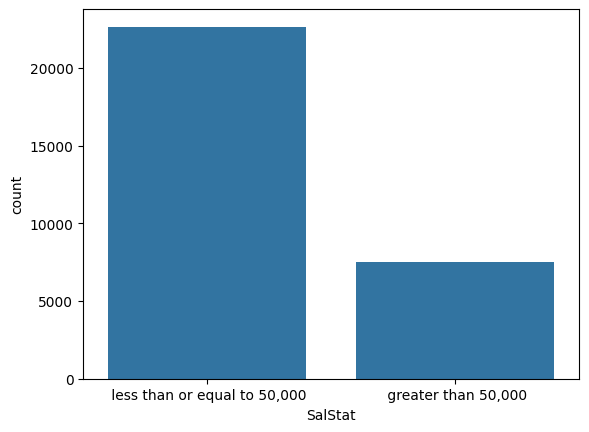

In [59]:
#frequency distribution of salary status

salstat=sns.countplot(x=data2["SalStat"])

C:\Users\raamp\AppData\Local\Temp\ipykernel_19936\3197226026.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2["age"],bins=10,kde=False)


<Axes: xlabel='age'>

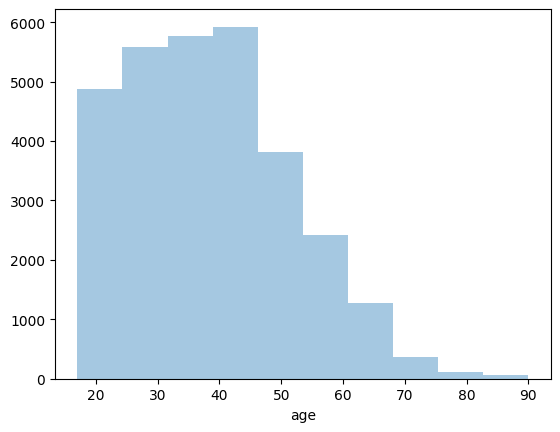

In [65]:
sns.distplot(data2["age"],bins=10,kde=False)

SalStat
greater than 50,000             43.0
less than or equal to 50,000    34.0
Name: age, dtype: float64

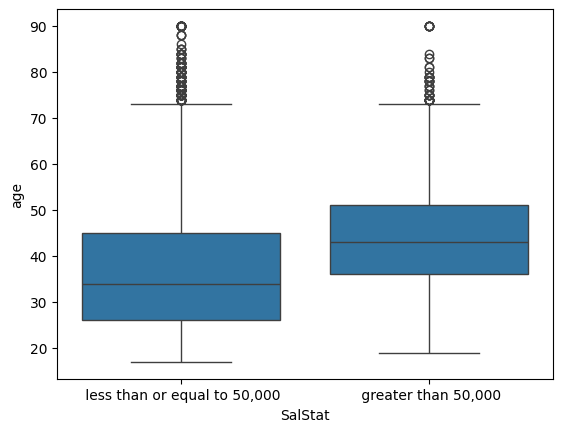

In [70]:
sns.boxplot(x="SalStat",y="age",data=data2)
data2.groupby("SalStat")["age"].median()

In [ ]:
sns.pairplot(

In [75]:
print(help(sns.pairplot))

Help on function pairplot in module seaborn.axisgrid:

pairplot(data, *, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False, dropna=False, plot_kws=None, diag_kws=None, grid_kws=None, size=None)
    Plot pairwise relationships in a dataset.

    By default, this function will create a grid of Axes such that each numeric
    variable in ``data`` will by shared across the y-axes across a single row and
    the x-axes across a single column. The diagonal plots are treated
    differently: a univariate distribution plot is drawn to show the marginal
    distribution of the data in each column.

    It is also possible to show a subset of variables or plot different
    variables on the rows and columns.

    This is a high-level interface for :class:`PairGrid` that is intended to
    make it easy to draw a few common styles. You should use :class:`PairGrid`
    directly if you need 